# ⚠️ **Important Disclaimer**

Do **not edit or delete** any of the **Markdown cells** (the ones containing the questions and instructions).

Only write your answers in the **code cells provided below each question**.  
This ensures consistency during our feedback process.

### Q1. Load and Explore the Dataset

Load the `AirQalityDataset.csv` file into a pandas DataFrame using the correct separator.

After loading the data:

1. Display basic information about the dataset.
2. Save the statistical description of the dataset into a separate variable.
3. Drop fully empty/unnamed columns, and rows
4. Use `type()` to print the type of that description variable.

In [1]:
# Loading Air Quality data
import pandas as pd
air_df = pd.read_csv('AirQualityDataset.csv', delimiter = ';')
print(air_df.head())

# basic info
air_df.info()

#stats
air_df_stats = air_df.describe()
print(air_df_stats)

# Min values indicate invalid entries, but will be dealt with as needed to avoid conflits with current and future instructions
# Coluns like NMHC indicate bigger problems with data


# drop fully empty rows and columns
air_df = air_df.dropna(how='all', axis=0)
air_df = air_df.dropna(how='all', axis=1)

#Print Type
print(type(air_df_stats))

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

### Q2. Dataset structure and features overview  
Write a code to collect:
1. The number of rows and columns in the dataset.
2. The list of first 10 feature columns excluding `'Date'` and `'Time'`.  

Store both lists in tuple called `dataset_info` and print it.

In [2]:
# your Code Here
air_df_shape = list(air_df.shape)

# The list of first 10 feature columns excluding Date' and Time'
feature_columns = air_df.columns[2:12].tolist()

# Store both in a tuple
dataset_info = (air_df_shape,feature_columns)
print(dataset_info)

([9357, 15], ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])


### Q3. CO(GT) summary with Pandas and NumPy
Compute the **mean** and **standard deviation** of `CO(GT)` using both:
- Pandas
- NumPy

In [3]:
# computing with pandas
pd_df_cogt_mean = air_df['CO(GT)'].mean()
pd_df_cogt_std = air_df['CO(GT)'].std()


# computing with numpy
import numpy as np
np_df_cogt_std = np.std(air_df['CO(GT)'])
np_df_cogt_mean = np.mean(air_df['CO(GT)'])

print(f"""Computing mean and standard deviation with Pandas and Numpy, the results were: 
    Mean with Pandas:, {pd_df_cogt_mean}
    Std with Pandas:, {pd_df_cogt_std}
 
    Mean with NumPy:, {np_df_cogt_mean}
    Std with NumPy:, {np_df_cogt_std} """
    )



Computing mean and standard deviation with Pandas and Numpy, the results were: 
    Mean with Pandas:, -34.207523778989
    Std with Pandas:, 77.65717034682939
 
    Mean with NumPy:, -34.207523778989
    Std with NumPy:, 77.65302055280891 


### Q4. Absolute humidity (AH) distribution  
Compute the **min**, **median**, and **max** of `AH` using Pandas.  

Do you notice an issue in the values?  
If you think that there are values that are problematic, replace them with the median of the column and print the same three statistics after that.


 Initial 
      Min: 0.1847, Median: 0.9768, Max: 2.231
 After replacement 
      Min: 0.1847, Median: 0.9768, Max: 2.231


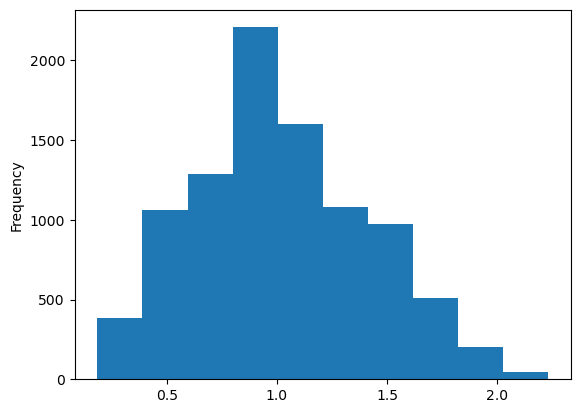

In [ ]:
# min max and median of 'AH'
min_ah = air_df['AH'].min()
median_ah = air_df['AH'].median()
max_ah = air_df['AH'].max()

print(f""" Initial 
      Min: {min_ah}, Median: {median_ah}, Max: {max_ah}""")

# plot histogram to visualize distribution
air_df['AH'].plot.hist()



 After replacement 
      Min: 0.1847, Median: 0.9768, Max: 2.231


<Axes: ylabel='Frequency'>

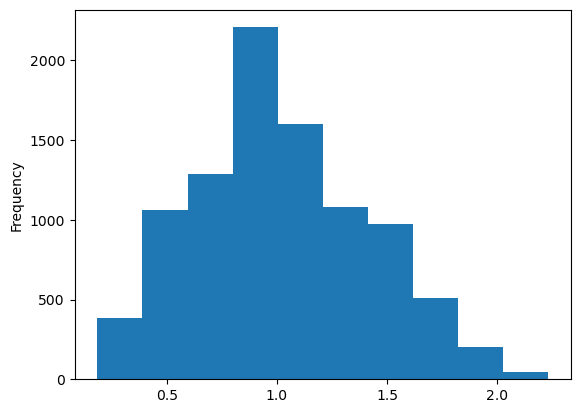

In [4]:
# replace invalid entries and check again
air_df.loc[air_df['AH'] < -175, 'AH'] = 0.976800

min_ah = air_df['AH'].min()
median_ah = air_df['AH'].median()
max_ah = air_df['AH'].max()

print(f""" After replacement 
      Min: {min_ah}, Median: {median_ah}, Max: {max_ah}""")

air_df['AH'].plot.hist()

,T,RH
count,9357.000000,9357.000000
mean,9.778305,39.485380
std,43.203623,51.216145
min,-200.000000,-200.000000
25%,10.900000,34.100000
50%,17.200000,48.600000
75%,24.100000,61.900000
max,44.600000,88.700000


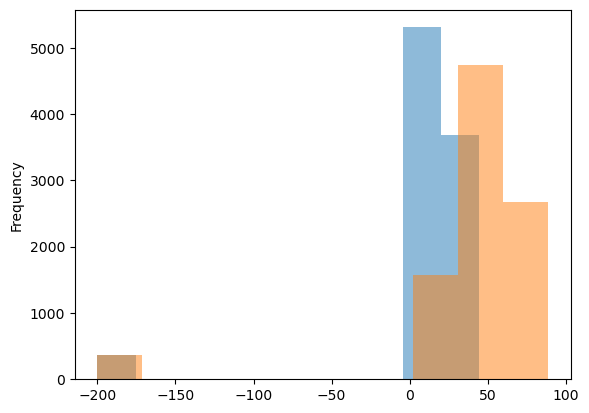

In [7]:
# I cleaned both T and RH here before proceeding to next questions because they would be affected

air_df['T'].plot.hist(alpha= 0.5)
air_df['RH'].plot.hist(alpha= 0.5)

air_df[['T','RH']].describe()

,T,RH
count,9357.000000,9357.000000
mean,18.274105,49.209394
std,8.660352,16.975247
min,-1.900000,9.200000
25%,12.000000,36.600000
50%,17.200000,48.600000
75%,24.100000,61.900000
max,44.600000,88.700000


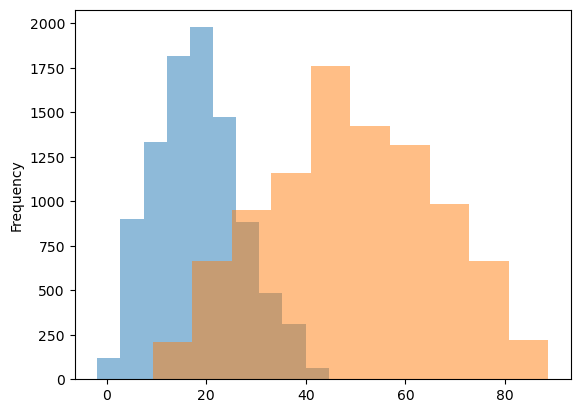

In [8]:
air_df.loc[air_df['T'] < -150, 'T'] = 17.200000
air_df.loc[air_df['RH'] < -150, 'RH'] = 48.600000

air_df['T'].plot.hist(alpha= 0.5)
air_df['RH'].plot.hist(alpha= 0.5)
air_df[['T','RH']].describe()

### Q5. Humidity bands
Create a new column `humidity_band` using `RH`:
- `'dry'` if `RH < 30`
- `'comfortable'` if `30 <= RH <= 60`
- `'humid'` if `RH > 60`

Then show the **count** of each category.

In [6]:
# your Code Here
# Define bins and labels
rh_bins = [-float('inf'), 30, 60, float('inf')]
rh_labels = ['dry', 'comfortable', 'humid']

# Create the new column
air_df['humidity_band'] = pd.cut(air_df['RH'], bins = rh_bins, labels = rh_labels)

print(air_df[['RH','humidity_band']])

# Show total count for each category 
air_df['humidity_band'].value_counts()

        RH humidity_band
0     48.9   comfortable
1     47.7   comfortable
2     54.0   comfortable
3     60.0   comfortable
4     59.6   comfortable
...    ...           ...
9352  29.3           dry
9353  23.7           dry
9354  18.3           dry
9355  13.5           dry
9356  13.1           dry

[9357 rows x 2 columns]


humidity_band
comfortable    4917
humid          2633
dry            1807
Name: count, dtype: int64

### Q6. Compute the Average 'CO(GT)' for Humid Conditions  

Using the `'humidity_band'` column created above, filter the dataset for rows labeled `'humid'` and compute the **average value of `'CO(GT)'`** for these observations.  

Format the output to 4 decimal places for better readability and precision.

In [11]:
# Average COgt when 'humid'
avg_cogt_when_humid = air_df[air_df['humidity_band'] == 'humid']['CO(GT)'].mean()

print(f"Average CO(GT) when 'humid' is: {round(avg_cogt_when_humid,4)}")

Average CO(GT) when 'humid' is: -35.5567


### Q7. Retrieve and sort array by a specific column
Create a NumPy array from the columns `[T, RH, AH]` (in this order), then sort the array by the **third column (`AH`)** ascending. Show the first 5 rows.

In [7]:
# creat air quality array with numpy
air_array = np.array([air_df['T'],air_df['RH'],air_df['AH']]).T

# Sort the array by the third column (AH)
air_array_sorted = air_array[air_array[:,2].argsort()]
air_array_sorted

# Show the first 5 rows
print(air_array_sorted[:5])

[[ 0.     29.7     0.1847]
 [11.8    13.5     0.1862]
 [ 0.2    30.2     0.191 ]
 [-0.1    31.9     0.1975]
 [12.2    14.      0.1988]]


### Q8. Normalized moisture index

Using the NumPy array you built above (**Do not change it**):  

1. Using Numpy, **Convert RH to a fraction** (0–1 scale) by dividing it by 100 and save it to another array `RH_frac`.
2. Using Numpy, **Compute a normalized moisture index** by dividing `AH` by `RH_frac`. This almost computes the amount of absolute humidity per unit of relative humidity.

Print the first 10 values of this new array and then **store** the result in the original DataFrame as a new column `'moisture_index'`.

In [8]:
# Convert RH (second column) to a fraction
RH_frac = air_array[:, 1] / 100

# Compute the normalized moisture index (AH / RH_frac)
moisture_index = air_array[:, 2] / RH_frac

# Show the first 5 values of the moisture index
print(moisture_index[:10])


# Add the result as a new column in the original Dataframe
air_df['moisture_index'] = moisture_index

air_df[['T','RH','AH','moisture_index']]


[1.54969325 1.52096436 1.38925926 1.31116667 1.32348993 1.32567568
 1.33855634 1.28366667 1.28107203 1.2486711 ]


,T,RH,AH,moisture_index
0,13.6,48.9,0.7578,1.549693
1,13.3,47.7,0.7255,1.520964
2,11.9,54.0,0.7502,1.389259
3,11.0,60.0,0.7867,1.311167
4,11.2,59.6,0.7888,1.323490
...,...,...,...,...
9352,21.9,29.3,0.7568,2.582935
9353,24.3,23.7,0.7119,3.003797
9354,26.9,18.3,0.6406,3.500546
9355,28.3,13.5,0.5139,3.806667


### Q9. Temperature profile for high moisture index  

Using Numpy only, and the `moisture_index` values you computed earlier:  

1. Find the **median** of `moisture_index`.  
2. Filter `tri_array` to include only rows where `moisture_index` is above this median.  
3. Compute and print the **mean temperature** for this high-moisture group using only NumPy.

Format the output to 4 decimal places for better readability and precision.

In [9]:
# find median
mid_moisture_index = np.median(moisture_index)

# Filter air_array to include only rows where moisture_index is above the median
high_moisture_mask = moisture_index > mid_moisture_index
tri_array = air_array[high_moisture_mask]

# Compute the mean temperature for the tri_array 
mean_temperature = np.mean(tri_array[:, 0]) # first column is T

print(f"Mean temperature for the tri_array is {round(mean_temperature,4)} .")

Mean temperature for the tri_array is 25.2345 .


### Q10. Percentile-based filtering
Compute:
- the **85th percentile** of `C6H6(GT)` (benzene), and
- the **25th percentile** of `RH`.

Filter and return rows where `C6H6(GT)` is **above** its 85th percentile **and** `RH` is **below** its 25th percentile. Show the number of rows and the first 5 matches.


-200.0


count    9357.000000
mean        1.865683
std        41.380206
min      -200.000000
25%         4.000000
50%         7.900000
75%        13.600000
max        63.700000
Name: C6H6(GT), dtype: float64

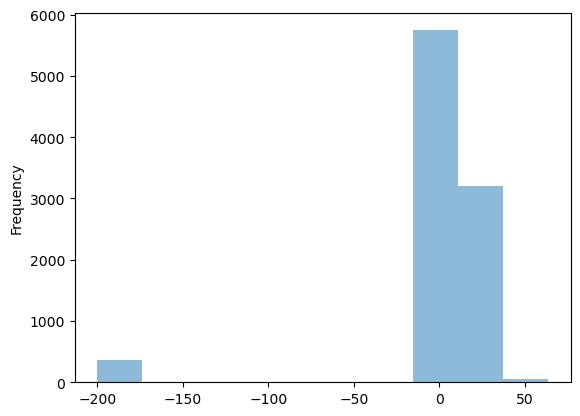

In [11]:
#Find 85th percentile of C6H6
print (np.percentile(air_df['C6H6(GT)'],0.85))

# Because invalid entries and highly skewing the results, i investigated more and cleaned the column
air_df['C6H6(GT)'].plot.hist(alpha= 0.5)
air_df['C6H6(GT)'].describe()


count    9357.000000
mean        9.997713
std         7.314906
min         0.100000
25%         4.600000
50%         7.900000
75%        13.600000
max        63.700000
Name: C6H6(GT), dtype: float64

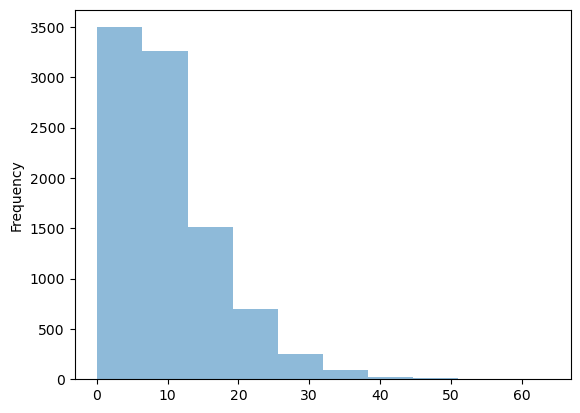

In [20]:
air_df.loc[air_df['C6H6(GT)'] < -150, 'C6H6(GT)'] = 7.900000
air_df['C6H6(GT)'].plot.hist(alpha= 0.5)
air_df['C6H6(GT)'].describe()

In [12]:
#Find 85th percentile of C6H6
c6h6gt_85th = np.percentile(air_df['C6H6(GT)'],85)

#Find 25th percentile of RH
rh_25th = np.percentile(air_df['C6H6(GT)'],25)

print(f"85th percentile of C6H6: {c6h6gt_85th}, 25th percentile of RH: {rh_25th}")

# Filter dataframe 
filtered_air_df = air_df[(air_df['C6H6(GT)'] > c6h6gt_85th) & (air_df['RH'] > rh_25th)]

# Show the number of rows and the first 5 matches
print(f"Number of matching rows: {len(filtered_air_df)}")
filtered_air_df.head()

85th percentile of C6H6: 17.3, 25th percentile of RH: 4.0
Number of matching rows: 1393


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,humidity_band,moisture_index
24,11/03/2004,18.00.00,4.8,1581.0,307.0,20.8,1319.0,281.0,799.0,151.0,2083.0,1409.0,10.3,64.2,0.8065,humid,1.256231
25,11/03/2004,19.00.00,6.9,1776.0,461.0,27.4,1488.0,383.0,702.0,172.0,2333.0,1704.0,9.7,69.3,0.8319,humid,1.200433
26,11/03/2004,20.00.00,6.1,1640.0,401.0,24.0,1404.0,351.0,743.0,165.0,2191.0,1654.0,9.6,67.8,0.8133,humid,1.199558
38,12/03/2004,08.00.00,4.4,1587.0,202.0,17.9,1236.0,307.0,897.0,141.0,1900.0,1400.0,7.3,63.1,0.6499,humid,1.029952
39,12/03/2004,09.00.00,-200.0,1545.0,-200.0,22.1,1353.0,-200.0,767.0,-200.0,2058.0,1588.0,9.2,56.2,0.6561,comfortable,1.167438


### Q11. Simulate Sensor Measurement Noise and Analyze the Effect  

Simulate **normally distributed measurement noise** with a mean of `0` and a standard deviation of `100` (in raw sensor units). Then:  

- Use **NumPy** to generate the noise.  
- Use **Pandas** to add this noise to the `'PT08.S1(CO)'` column and store the result in a new column `'PT08.S1_noisy'`.  
- Print the **mean** and **standard deviation** of both `'PT08.S1(CO)'` and `'PT08.S1_noisy'` to observe the impact of the simulated noise.  

Observe how the added noise affects the distribution, particularly the spread (**standard deviation**). Format all printed values to **4 decimal places** using `.4f`.  


In [23]:
import numpy as np
np.random.seed(0)


# Simulate normally distributed noise with mean=0 and std=100
noise = np.random.normal(loc=0, scale=100, size=len(air_df))

# Add the noise to the 'PT08.S1(CO)' column to create the 'PT08.S1_noisy' column
air_df['PT08.S1_noisy'] = air_df['PT08.S1(CO)'] + noise

# Calculate and print the mean and standard deviation for both columns
mean_PT08_S1 = air_df['PT08.S1(CO)'].mean()
std_PT08_S1 = air_df['PT08.S1(CO)'].std()

mean_PT08_S1_noisy = air_df['PT08.S1_noisy'].mean()
std_PT08_S1_noisy = air_df['PT08.S1_noisy'].std()

# Print the results formatted to 4 decimal places
print(f"Mean of 'PT08.S1(CO)': {mean_PT08_S1:.4f}")
print(f"Standard deviation of 'PT08.S1(CO)': {std_PT08_S1:.4f}")
print(f"Mean of 'PT08.S1_noisy': {mean_PT08_S1_noisy:.4f}")
print(f"Standard deviation of 'PT08.S1_noisy': {std_PT08_S1_noisy:.4f}")


Mean of 'PT08.S1(CO)': 1048.9901
Standard deviation of 'PT08.S1(CO)': 329.8327
Mean of 'PT08.S1_noisy': 1046.8703
Standard deviation of 'PT08.S1_noisy': 345.1911


# Make Your Results Reproducible

If you re-run the previous cell multiple times, you'll notice that the results involving randomness (e.g., simulated noise) change each time. This is because NumPy generates new random numbers on every execution.

To make your results **reproducible** (meaning that both you and your instructor get the **same output every time**) you need to set a fixed **random seed**.

As the final task, go back and add the following line to your code **immediately after importing NumPy** for the first time in your notebook:

```python
np.random.seed(0)


So, your NumPy import at the top of the notebook should now look like this:

```python
import numpy as np
np.random.seed(0)


# After Making This Change:

- Re-run **all cells** in the notebook from top to bottom.  
- Make sure **all outputs are visible**.  
- **Save your notebook.**  
- **Submit it as-is (with all outputs included.)**
